# singel linear regression model training

In [ ]:
#Q.1 Assumptio of Linear Regression explains in detail with an example using any of your choice Case study from Kaggle Files

#Assumptions in Regression
#Regression is a parametric approach.

#‘Parametric’ means it makes assumptions about data for the purpose of analysis.

# Due to its parametric side, regression is restrictive in nature. It fails to deliver good results with data sets which doesn’t fulfill its assumptions.

#Therefore, for a successful regression analysis, it’s essential to validate these assumptions.

#So, how would you check (validate) if a data set follows all regression assumptions? You check it using the regression plots (explained below) along with some statistical test.

#Let’s look at the important assumptions in regression analysis:

#There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.

#There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.

#The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.

#The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.

 The error terms must be normally distributed 

In [1]:
# formula for Linear Regression is 
# yhat= theta0+theta1x 
# theta0 = intecept 
# theta1=slop 
# x = feature or variable or indepdent variable 
# accuracy checking formula or estimation formula MSE = sum((y-yhat)**2)/n 
# linear regression develop one straight line which is near to all data points 
# it is ml algorithm which help me to do prediction 
# which is also useful whenever our data have correlation

In [2]:
#import required modules 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
# in this case study we took clean dataset as we beginer to ML model training 
# EDA process already performed on this dataset 
# data is from advertisement compan they want to predict ROI on based of 
# previous investment and ROI

In [4]:
# read data into DataFrame 
df=pd.read_csv("data/advertising.csv")

In [5]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
# here TV,Radio,Newspaper is feature 
# sales is target 
# TV,RAdio,newspaper is continuous 
# sales is also continous 

In [7]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
# data cleaning for Unnamed: 0
df.drop("Unnamed: 0",axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
# get statistical summery 
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
corr=df.corr()

In [13]:
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [14]:
# TV and sales have low correlation 
# only TV is feature which seems more correlated as compared radio and newspaper

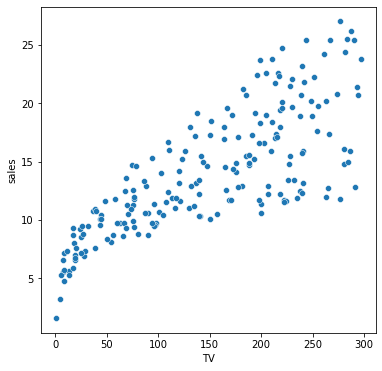

In [15]:
# graphical univariate analysis 
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x="TV",y="sales")
plt.show()
# my data scatter plot is hetroscadastics 

In [16]:
# then also i will try to make linear regression model 
x=df[['TV']] # feature
y=df[['sales']] # target

# train test split for model training

In [17]:
# import required modules 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [18]:
# split data 
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               random_state=1,
                                               test_size=0.3)
# split done 70% training 30% testing based 
# random_state = we instruct split algorithm to split data randomly with 1 state

In [19]:
# Model Training 
lr=LinearRegression() # object will be created
# llearning model on given data 
# use theta0+theta1x to calculate bestfit prediction line 
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
lr.coef_ # slop

array([[0.04812204]])

In [21]:
lr.intercept_ # intecept

array([6.92351954])

In [22]:
# now model is trained and ready to predict 
# but before we use it for prediction let's check it's accuracy 
y_pred=lr.predict(x_test)

In [23]:
y_test # x_test original   y
y_pred # prediction x_test yhat 

# MSE = sum((y-yhat)**2)/n 

array([[17.06764591],
       [16.66823297],
       [11.52879892],
       [20.4073156 ],
       [19.1368937 ],
       [20.57093054],
       [14.78184893],
       [15.62398466],
       [10.32093567],
       [17.2890073 ],
       [14.83959538],
       [10.25356482],
       [17.25532187],
       [12.20731971],
       [17.78947654],
       [12.97246017],
       [13.26119242],
       [20.91259704],
       [ 8.1554438 ],
       [17.06283371],
       [11.75497252],
       [10.18619396],
       [ 8.13138278],
       [12.09182681],
       [12.35649804],
       [15.98971218],
       [ 8.99757953],
       [18.89628349],
       [14.95027608],
       [18.47762173],
       [18.46799732],
       [18.2081383 ],
       [14.12738917],
       [15.11389102],
       [18.87703468],
       [15.82128503],
       [17.62586159],
       [13.15051172],
       [17.35637816],
       [ 7.86671155],
       [ 7.55391828],
       [11.2737521 ],
       [ 7.82340171],
       [16.74522823],
       [ 7.27481044],
       [14

In [24]:
y_test

,sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6
198,25.5
95,16.9
4,12.9
29,10.5
168,17.1


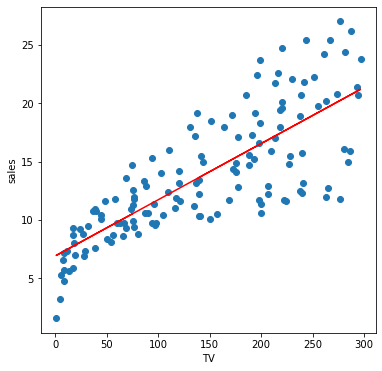

In [25]:
# draw line using sctter plot 
plt.figure(figsize=(6,6))
plt.scatter(x_train,y_train)
y_train_predict=lr.predict(x_train)
plt.plot(x_train,y_train_predict,color="red")
plt.xlabel("TV")
plt.ylabel("sales")
plt.show()
# redline is yhat line 
# blue dots are orginal y

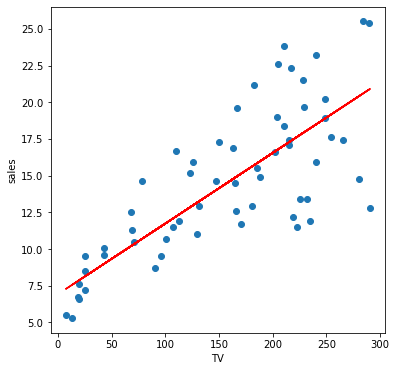

In [26]:
# draw line using sctter plot 
plt.figure(figsize=(6,6))
plt.scatter(x_test,y_test)
y_test_predict=lr.predict(x_test)
plt.plot(x_test,y_test_predict,color="red")
plt.xlabel("TV")
plt.ylabel("sales")
plt.show()
# redline is yhat line 
# blue dots are orginal y 

In [27]:
# predict slaes 
newx=850 # if i do investment of 850 Rs then waht will be sales 
newy=lr.predict([[newx]])
print("your prediction for Rs 850 is {}".format(newy))

your prediction for Rs 850 is [[47.82725492]]
